In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df =  pd.read_csv("merged_stock_sentiment_data.csv")
df.tail()

,Adj Close,Close,High,Low,Open,Volume,Company,Date,Target,Score,Comments,Cleaned_Text,Sentiment,Sentiment_Score
12064,205.740005,205.740005,207.639999,205.050003,206.979996,28061600,Amazon,2024-11-27,1,0,23,im taking hard look spending got thinking amaz...,Positive,0.999907
12065,205.740005,205.740005,207.639999,205.050003,206.979996,28061600,Amazon,2024-11-27,1,31,307,please use thread discussion dont feel warrant...,Positive,0.999910
12066,207.889999,207.889999,208.199997,204.589996,205.830002,24892400,Amazon,2024-11-29,1,0,35,previously compared portfolio strategist inves...,Positive,0.999987
12067,237.330002,237.330002,237.809998,233.970001,234.809998,28481400,Apple,2024-11-29,0,0,2,hey anybody made purchase apple paid time chas...,Positive,0.998584
12068,237.330002,237.330002,237.809998,233.970001,234.809998,28481400,Apple,2024-11-29,0,0,2,disabled mobility impairment brain impairment ...,Positive,0.994461


In [50]:
# Drop rows where Cleaned_Text is empty, NaN, or only whitespace
df = df[df['Cleaned_Text'].notna()]  # Remove NaNs
df = df[df['Cleaned_Text'].str.strip() != '']  # Remove empty strings or whitespace

In [51]:
df.isna().sum()

Adj Close          0
Close              0
High               0
Low                0
Open               0
Volume             0
Company            0
Date               0
Target             0
Score              0
Comments           0
Cleaned_Text       0
Sentiment          0
Sentiment_Score    0
dtype: int64

In [52]:
sentiment_df = df[["Date", "Cleaned_Text","Sentiment"]]
trade_df = df[["Date", "Sentiment","Close","Adj Close", "Close","High","Low", "Open","Volume", "Company","Target",]]
sentiment_df.head()

,Date,Cleaned_Text,Sentiment
0,2010-09-20,stock market game iphone ipad play,Positive
1,2010-12-13,hussman warning awful time invest,Neutral
2,2010-12-15,awful time invest reflection lost opportunity,Negative
3,2011-02-24,amazon prime streaming disrupt netflix,Negative
4,2011-09-12,personally im fan theyre already beatendown pr...,Negative


In [53]:
trade_df.head()

,Date,Sentiment,Close,Adj Close,Close,High,Low,Open,Volume,Company,Target
0,2010-09-20,Positive,10.115357,8.532785,10.115357,10.135000,9.851786,9.860000,658677600,Apple,1
1,2010-12-13,Neutral,8.712500,8.712500,8.712500,8.897000,8.686500,8.816500,84050000,Amazon,1
2,2010-12-15,Negative,8.778500,8.778500,8.778500,8.950000,8.679500,8.686000,116210000,Amazon,1
3,2011-02-24,Negative,8.887500,8.887500,8.887500,8.987500,8.728000,8.843000,93130000,Amazon,1
4,2011-09-12,Negative,13.569286,11.446334,13.569286,13.602857,13.282143,13.321429,467832400,Apple,-1


In [54]:
trade_df["Sentiment"].value_counts()

Sentiment
Positive    9253
Neutral     1544
Negative    1118
Name: count, dtype: int64

## EDA


Text(0, 0.5, 'Importance')

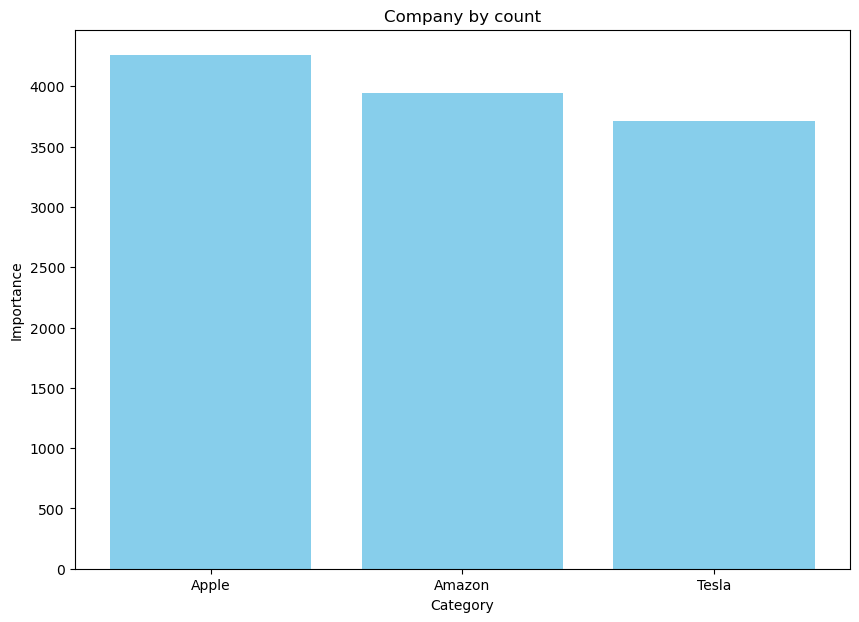

In [55]:
value = trade_df["Company"].value_counts()
plt.figure(figsize=(10, 7))
plt.bar(trade_df["Company"].unique(),value, color = "skyblue")
plt.title("Company by count")
plt.xlabel("Category")
plt.ylabel("Importance")

In [56]:
sentiment_df.index = pd.to_datetime(sentiment_df["Date"])
sentiment_df.index

DatetimeIndex(['2010-09-20', '2010-12-13', '2010-12-15', '2011-02-24',
               '2011-09-12', '2011-09-26', '2011-10-04', '2011-10-18',
               '2011-10-18', '2011-10-25',
               ...
               '2024-11-26', '2024-11-27', '2024-11-27', '2024-11-27',
               '2024-11-27', '2024-11-27', '2024-11-27', '2024-11-29',
               '2024-11-29', '2024-11-29'],
              dtype='datetime64[ns]', name='Date', length=11915, freq=None)

In [57]:
trade_df.index = pd.to_datetime(trade_df["Date"])
trade_df.index

DatetimeIndex(['2010-09-20', '2010-12-13', '2010-12-15', '2011-02-24',
               '2011-09-12', '2011-09-26', '2011-10-04', '2011-10-18',
               '2011-10-18', '2011-10-25',
               ...
               '2024-11-26', '2024-11-27', '2024-11-27', '2024-11-27',
               '2024-11-27', '2024-11-27', '2024-11-27', '2024-11-29',
               '2024-11-29', '2024-11-29'],
              dtype='datetime64[ns]', name='Date', length=11915, freq=None)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
sentiment_df["Sentiment"] = encoder.fit_transform(sentiment_df["Sentiment"])
sentiment_df.head()

trade_df["T"] = encoder.fit_transform(sentiment_df["Sentiment"])
sentiment_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10788\3409545791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df["Sentiment"] = encoder.fit_transform(sentiment_df["Sentiment"])


,Date,Cleaned_Text,Sentiment
Date,,,
2010-09-20,2010-09-20,stock market game iphone ipad play,2
2010-12-13,2010-12-13,hussman warning awful time invest,1
2010-12-15,2010-12-15,awful time invest reflection lost opportunity,0
2011-02-24,2011-02-24,amazon prime streaming disrupt netflix,0
2011-09-12,2011-09-12,personally im fan theyre already beatendown pr...,0


## Modeling 

In [65]:
##Classificating model for sentiment
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


#intansiate
model  = Pipeline([("tfidf", TfidfVectorizer(stop_words = "english")),("clf", LinearSVC(max_iter=1000, C=1, loss="squared_hinge",class_weight="balanced"))])

# inotialising features and target values 
x = sentiment_df["Cleaned_Text"]
y = sentiment_df["Sentiment"]

# splitting to training and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

# fitting data 
model.fit(x_train, y_train)

# make predictin 
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred)),
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.42      0.48       226
           1       0.59      0.59      0.59       296
           2       0.89      0.92      0.90      1861

    accuracy                           0.83      2383
   macro avg       0.68      0.64      0.66      2383
weighted avg       0.82      0.83      0.83      2383

0.8300461603021402


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder